In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [4]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot: xlabel='count', ylabel='Count'>

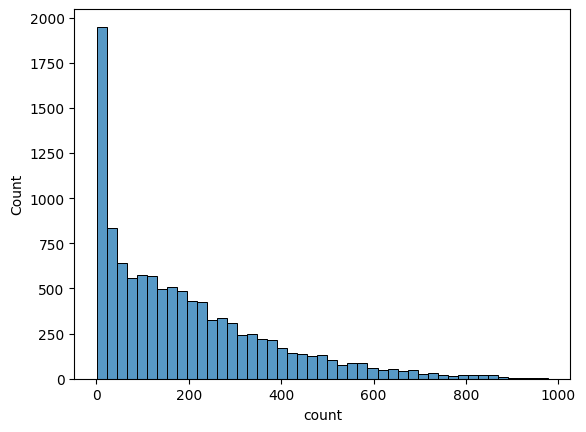

In [5]:
# changing the output variable to a category > one is going to be BINARY, one will be multiclass
sns.histplot(bikes['count'])

In [6]:
# for binary > use 145 bikes as the midpoint for High vs. Low
bikes['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [7]:
# binary output variable > 1 = High # of rentals, 0 = Low # of rentals
bikes['binary_output'] = bikes['count'].apply(lambda x: 1 if x >= 145 else 0)

In [11]:
bikes['multiclass_output'] = bikes['count'].apply(lambda x: 1 if x >= 0 and x <42 else 2 if x>= 42 and x <145 else 3 if x>=145 and x<284 else 4)

In [12]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,binary_output,multiclass_output
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,1


In [13]:
# binary problem > we can use Logistic Regression, KNN and Naive Bayes to make predictions
# check for data balance
bikes.groupby('binary_output').count()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,multiclass_output
binary_output,,,,,,,,,,,,,
0,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431,5431
1,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455


In [16]:
# pre-processing - first split the data into training and testing
X = bikes[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']]
y = bikes['binary_output']

In [18]:
# reserve 30% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
numeric_columns = ['temp','atemp','humidity','windspeed']
categorical_columns = ['season','holiday','workingday','weather']

In [20]:
# create a Column Transformer to SCALE the numeric columns and OneHotEncode the categoricals
preprocessor = ColumnTransformer(
    transformers=[('num',MinMaxScaler(),numeric_columns),
                  ('cat',OneHotEncoder(),categorical_columns)]
)

In [22]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,binary_output,multiclass_output
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,1


In [23]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [28]:
# cross validation to see in general which model performs best for the problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5 )
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=5 )
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=5 )


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [29]:
print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

0.7091863517060368
0.7275590551181101
0.6943569553805775


In [30]:
# while LogReg is the best, we'll work with KNN so we can see how to tune hyperparameters
# set up the pipeline
pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [31]:
# set up a params grid
param_grid = {
    'classifier__n_neighbors':[5,25,55,105,375,575],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan']
}

In [33]:
# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/pipeline.py", line 457, in predict
    Xt = transform.transform(Xt)
  File "/opt/homebrew/lib/python3.1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'humidity',
                                                                          'windspeed']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['season',
                                                                          'holiday',
                                                                          'workingday',
                                                                          'weather'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [5, 25, 55, 105, 375, 575],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [34]:
print(grid_search.best_params_)

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [35]:
# to set up our final pipeline, we can set up first our final model
final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric=grid_search.best_params_['classifier__metric'],
                                        weights=grid_search.best_params_['classifier__weights'])

In [36]:
# create final pipeline with BEST model
final_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',final_classifier)
])

In [38]:
# fit pipeline on X_train and y_train
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['temp', 'atemp', 'humidity',
                                                   'windspeed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['season', 'holiday',
                                                   'workingday',
                                                   'weather'])])),
                ('classifier', KNeighborsClassifier(metric='euclidean'))])

In [41]:
predictions = final_pipeline.predict(X_test)

In [42]:
# KNN is not a probabilistic model, but it does offer a predict_proba() function if we want to use it for threshold adjustment
probabilities = final_pipeline.predict_proba(X_test)

In [43]:
# after tuning the model with hyperparameters, accuracy score improved 3%
accuracy_score(y_test, predictions)

0.7348438456827924

In [44]:
precision_score(y_test, predictions)

0.754863813229572

In [45]:
recall_score(y_test, predictions)

0.7046004842615012

In [46]:
f1_score(y_test, predictions)

0.7288666249217283